**Importing the Dependencies**

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

**Data Loading and Understanding**

In [87]:
df=pd.read_csv("Autism Spectrum Disorder Dataset.csv")

In [88]:
df.shape

(800, 21)

In [89]:
df.head()

,ID,A1 Score,A2 Score,A3 Score,A4 Score,A5 Score,A6 Score,A7 Score,A8 Score,A9 Score,A10 Score,Age,Gender,Ethnicity,Jaundice,Austim,Country,Used App Before,Result,Relation,ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,Self,0


In [90]:
df.tail()

,ID,A1 Score,A2 Score,A3 Score,A4 Score,A5 Score,A6 Score,A7 Score,A8 Score,A9 Score,A10 Score,Age,Gender,Ethnicity,Jaundice,Austim,Country,Used App Before,Result,Relation,ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,Self,0


In [91]:
#Display all the columns in the output
pd.set_option('display.max_columns',None)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1 Score         800 non-null    int64  
 2   A2 Score         800 non-null    int64  
 3   A3 Score         800 non-null    int64  
 4   A4 Score         800 non-null    int64  
 5   A5 Score         800 non-null    int64  
 6   A6 Score         800 non-null    int64  
 7   A7 Score         800 non-null    int64  
 8   A8 Score         800 non-null    int64  
 9   A9 Score         800 non-null    int64  
 10  A10 Score        800 non-null    int64  
 11  Age              800 non-null    float64
 12  Gender           800 non-null    object 
 13  Ethnicity        800 non-null    object 
 14  Jaundice         800 non-null    object 
 15  Austim           800 non-null    object 
 16  Country          800 non-null    object 
 17  Used App Before 

In [93]:
#Converting age to integer
df["Age"]=df["Age"].astype(int)

In [94]:
df.head(2)

,ID,A1 Score,A2 Score,A3 Score,A4 Score,A5 Score,A6 Score,A7 Score,A8 Score,A9 Score,A10 Score,Age,Gender,Ethnicity,Jaundice,Austim,Country,Used App Before,Result,Relation,ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [95]:
for column in df.columns:
  numerical_columns=["ID","Age","Result"]
  if column not in numerical_columns:
    print(column,df[column].unique())
    print("-"*80)

A1 Score [1 0]
--------------------------------------------------------------------------------
A2 Score [0 1]
--------------------------------------------------------------------------------
A3 Score [1 0]
--------------------------------------------------------------------------------
A4 Score [0 1]
--------------------------------------------------------------------------------
A5 Score [1 0]
--------------------------------------------------------------------------------
A6 Score [0 1]
--------------------------------------------------------------------------------
A7 Score [1 0]
--------------------------------------------------------------------------------
A8 Score [0 1]
--------------------------------------------------------------------------------
A9 Score [1 0]
--------------------------------------------------------------------------------
A10 Score [1 0]
--------------------------------------------------------------------------------
Gender ['f' 'm']
----------------------

In [96]:
#Dropping ID column
df=df.drop(columns=["ID"])

In [97]:
df.shape

(800, 20)

In [98]:
df.head(2)

,A1 Score,A2 Score,A3 Score,A4 Score,A5 Score,A6 Score,A7 Score,A8 Score,A9 Score,A10 Score,Age,Gender,Ethnicity,Jaundice,Austim,Country,Used App Before,Result,Relation,ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [99]:
df.columns

Index(['A1 Score', 'A2 Score', 'A3 Score', 'A4 Score', 'A5 Score', 'A6 Score',
       'A7 Score', 'A8 Score', 'A9 Score', 'A10 Score', 'Age', 'Gender',
       'Ethnicity', 'Jaundice', 'Austim', 'Country', 'Used App Before',
       'Result', 'Relation', 'ASD'],
      dtype='object')

In [100]:
df["Country"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [101]:
mapping={
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}
df["Country"]=df["Country"].replace(mapping)

In [102]:
df["Country"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [103]:
#Target class distribution
df["ASD"].value_counts()

,count
ASD,
0,639
1,161


**Exploratory Data Abalysis**

In [104]:
df.shape

(800, 20)

In [105]:
df.columns

Index(['A1 Score', 'A2 Score', 'A3 Score', 'A4 Score', 'A5 Score', 'A6 Score',
       'A7 Score', 'A8 Score', 'A9 Score', 'A10 Score', 'Age', 'Gender',
       'Ethnicity', 'Jaundice', 'Austim', 'Country', 'Used App Before',
       'Result', 'Relation', 'ASD'],
      dtype='object')

In [106]:
df.head(2)

,A1 Score,A2 Score,A3 Score,A4 Score,A5 Score,A6 Score,A7 Score,A8 Score,A9 Score,A10 Score,Age,Gender,Ethnicity,Jaundice,Austim,Country,Used App Before,Result,Relation,ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [107]:
df.describe()

,A1 Score,A2 Score,A3 Score,A4 Score,A5 Score,A6 Score,A7 Score,A8 Score,A9 Score,A10 Score,Age,Result,ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis of Numeric Columns**

In [108]:
sns.set_theme(style="darkgrid")

**Distribution Plots**

Mean: 27.96375
Median: 24.0


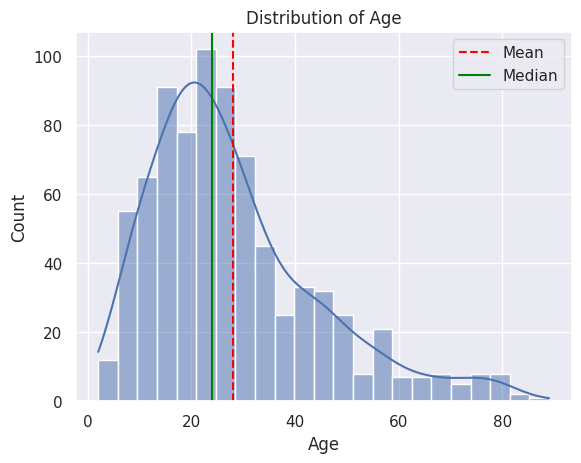

In [109]:
sns.histplot(df["Age"],kde=True)
plt.title("Distribution of Age")
age_mean=df["Age"].mean()
age_median=df["Age"].median()
print("Mean:",age_mean)
print("Median:",age_median)
#Vertical lines
plt.axvline(age_mean,color="red",linestyle="--",label="Mean")
plt.axvline(age_median,color="green",linestyle="-",label="Median")
plt.legend()
plt.show()

Mean: 8.537303106501248
Median: 9.605299308


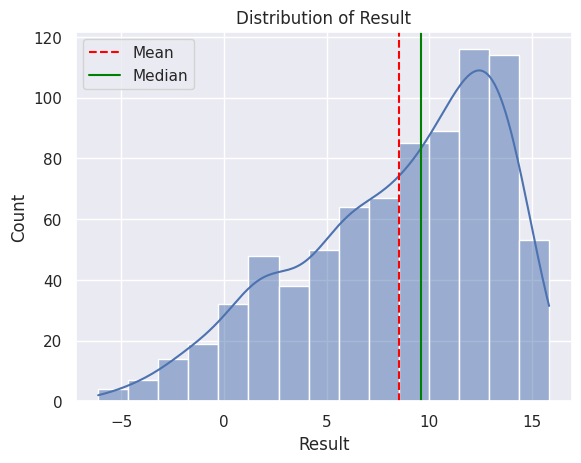

In [110]:
sns.histplot(df["Result"],kde=True)
plt.title("Distribution of Result")
result_mean=df["Result"].mean()
result_median=df["Result"].median()
print("Mean:",result_mean)
print("Median:",result_median)
plt.axvline(result_mean,color="red",linestyle="--",label="Mean")
plt.axvline(result_median,color="green",linestyle="-",label="Median")
plt.legend()
plt.show()

**Box Plots**

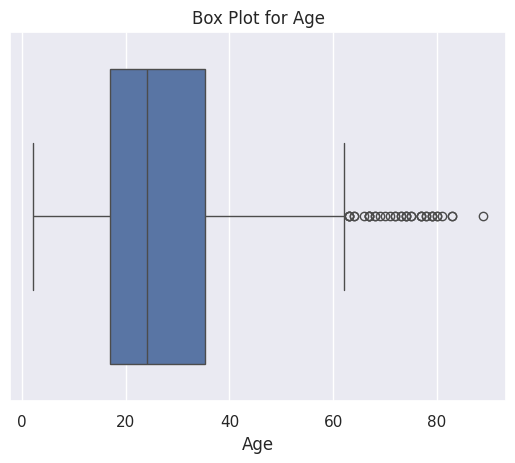

In [111]:
sns.boxplot(x=df["Age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

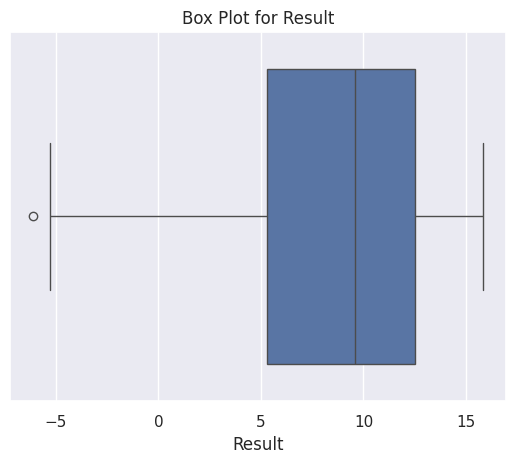

In [112]:
sns.boxplot(x=df["Result"])
plt.title("Box Plot for Result")
plt.xlabel("Result")
plt.show()

In [113]:
#Outliers count using IQR method
Q1=df["Age"].quantile(0.25)
Q3=df["Age"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
age_outliers=df[(df["Age"]<lower_bound) | (df["Age"]>upper_bound)]

In [114]:
len(age_outliers)

39

In [115]:
#Outliers count using IQR method
Q1=df["Result"].quantile(0.25)
Q3=df["Result"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
result_outliers=df[(df["Result"]<lower_bound) | (df["Result"]>upper_bound)]

In [116]:
len(result_outliers)

1

**Univariate Analysis of Categorical Columns**

In [117]:
df.columns

Index(['A1 Score', 'A2 Score', 'A3 Score', 'A4 Score', 'A5 Score', 'A6 Score',
       'A7 Score', 'A8 Score', 'A9 Score', 'A10 Score', 'Age', 'Gender',
       'Ethnicity', 'Jaundice', 'Austim', 'Country', 'Used App Before',
       'Result', 'Relation', 'ASD'],
      dtype='object')

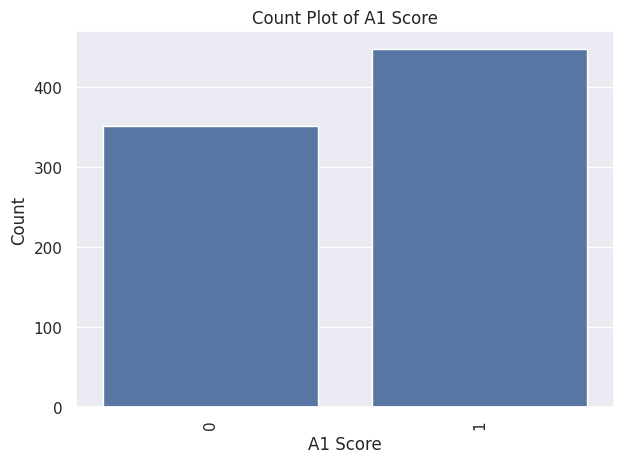

<Figure size 3000x1000 with 0 Axes>

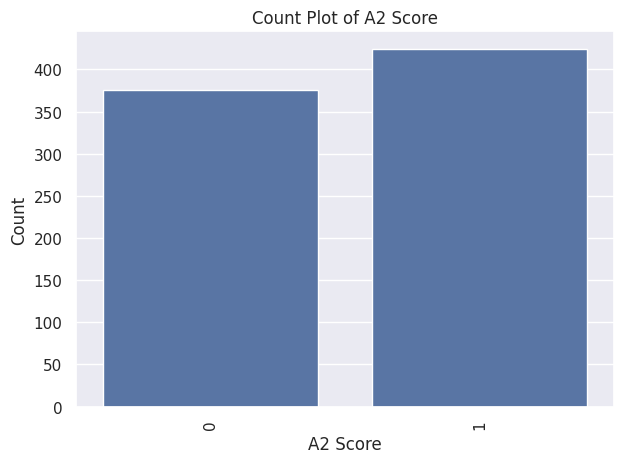

<Figure size 3000x1000 with 0 Axes>

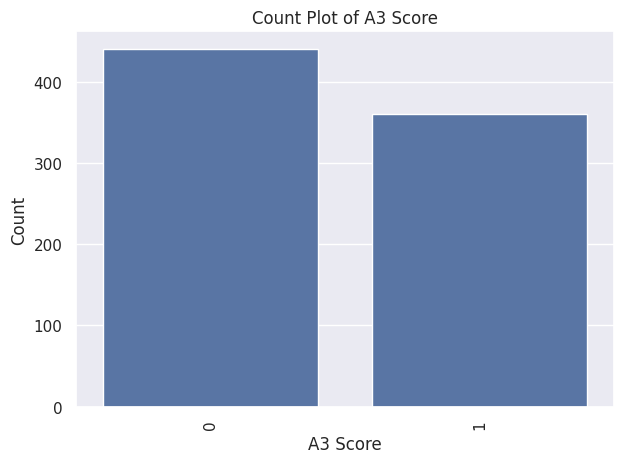

<Figure size 3000x1000 with 0 Axes>

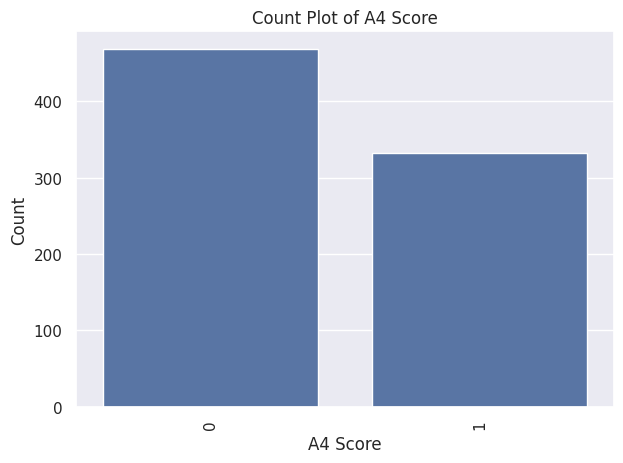

<Figure size 3000x1000 with 0 Axes>

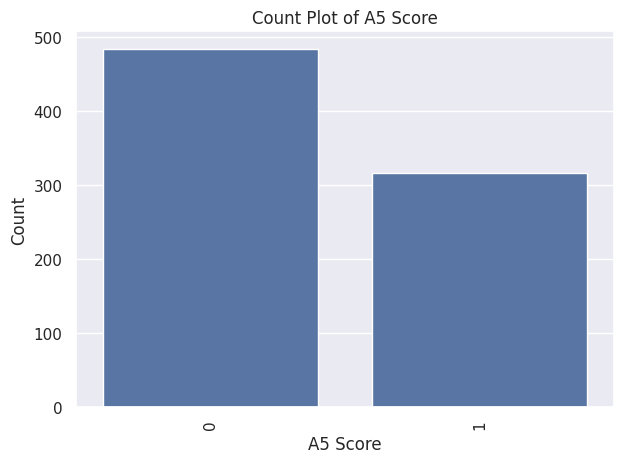

<Figure size 3000x1000 with 0 Axes>

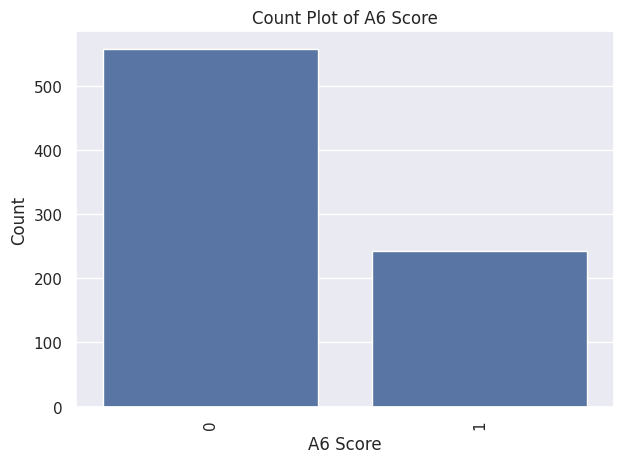

<Figure size 3000x1000 with 0 Axes>

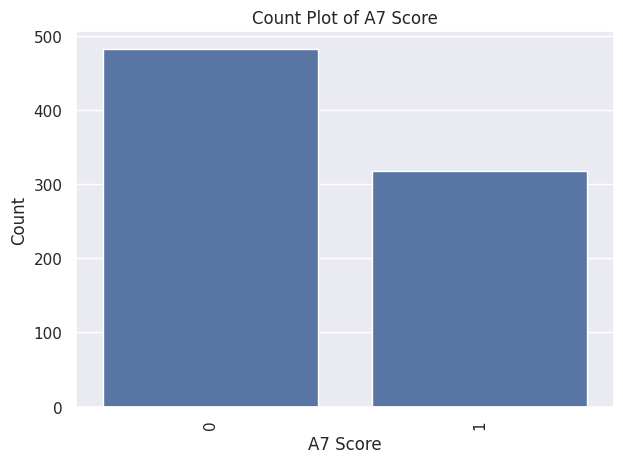

<Figure size 3000x1000 with 0 Axes>

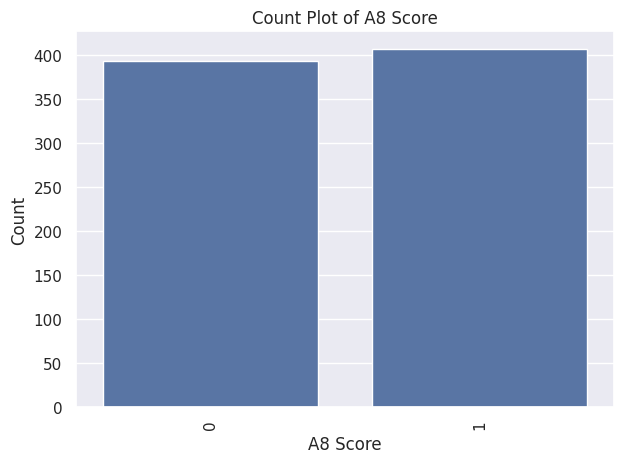

<Figure size 3000x1000 with 0 Axes>

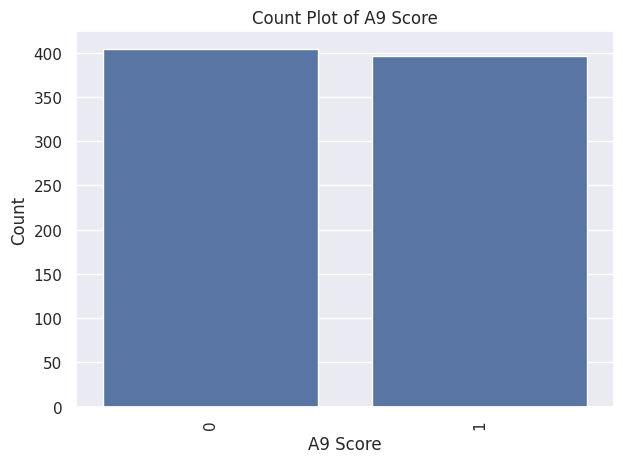

<Figure size 3000x1000 with 0 Axes>

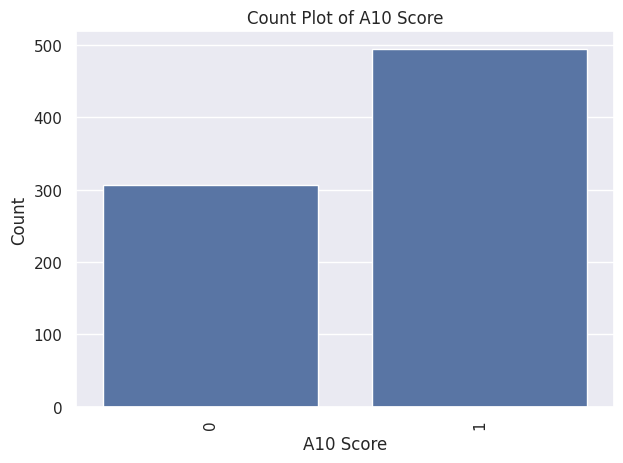

<Figure size 3000x1000 with 0 Axes>

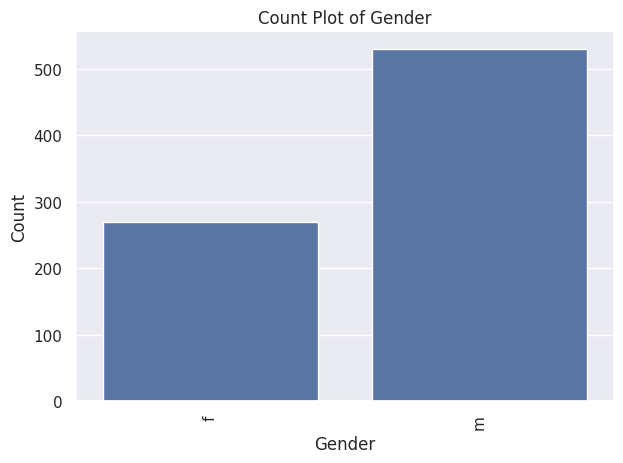

<Figure size 3000x1000 with 0 Axes>

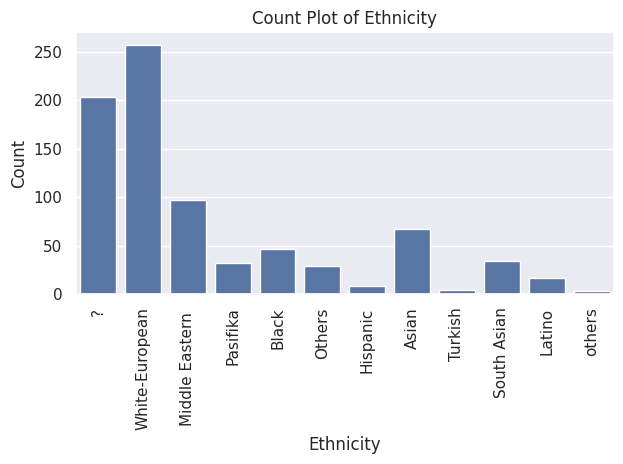

<Figure size 3000x1000 with 0 Axes>

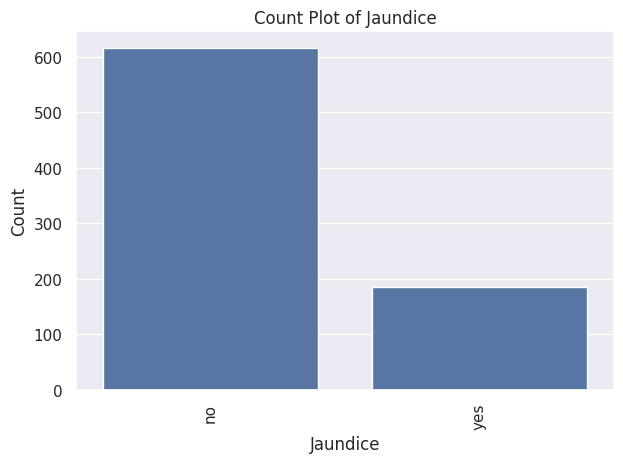

<Figure size 3000x1000 with 0 Axes>

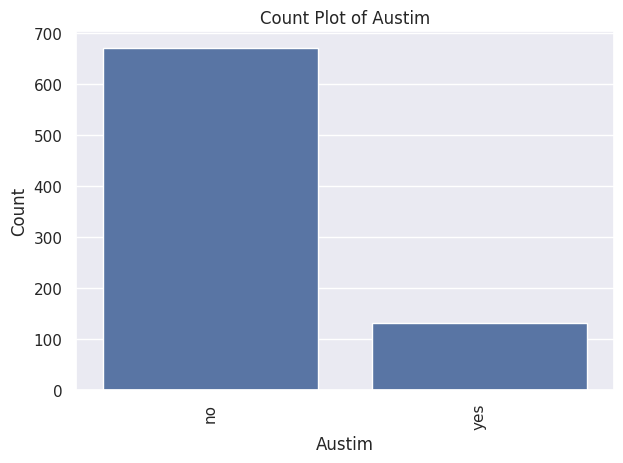

<Figure size 3000x1000 with 0 Axes>

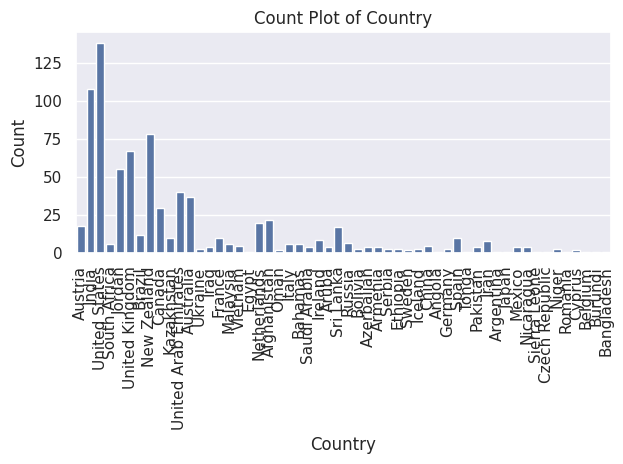

<Figure size 3000x1000 with 0 Axes>

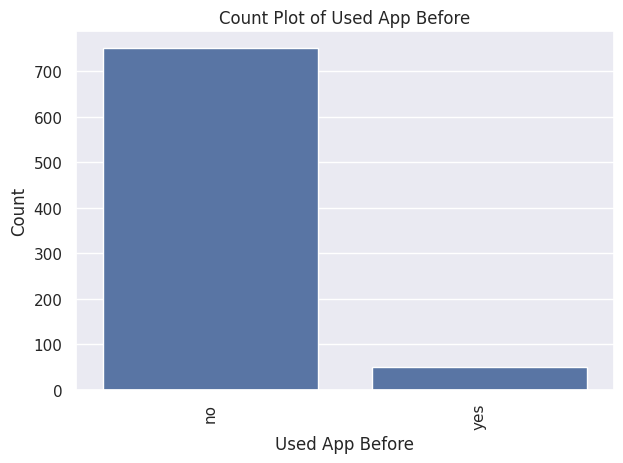

<Figure size 3000x1000 with 0 Axes>

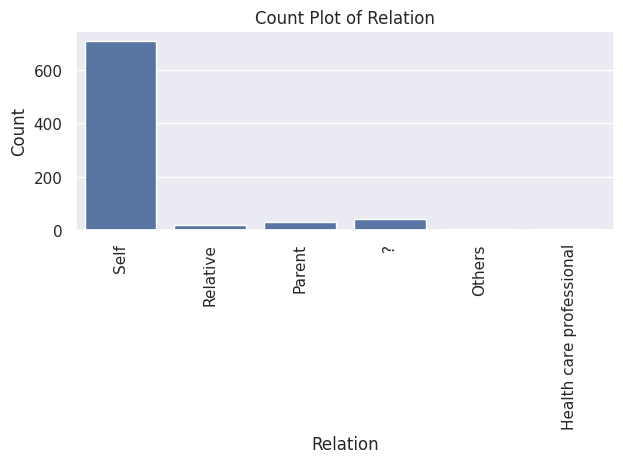

<Figure size 3000x1000 with 0 Axes>

In [118]:
categorical_columns=['A1 Score','A2 Score','A3 Score','A4 Score','A5 Score','A6 Score','A7 Score','A8 Score','A9 Score','A10 Score','Gender','Ethnicity','Jaundice','Austim','Country','Used App Before','Relation']
for column in categorical_columns:
  sns.countplot(x=df[column])
  plt.title(f"Count Plot of {column}")
  plt.xlabel(column)
  plt.ylabel("Count")
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.figure(figsize=(30,10))
  plt.show()

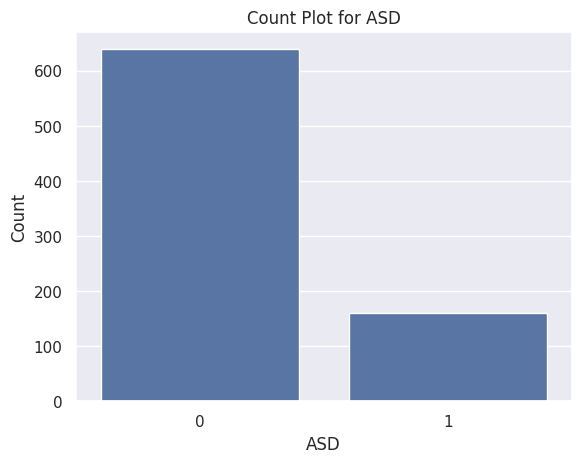

In [119]:
#Countplot for target column
sns.countplot(x=df["ASD"])
plt.title("Count Plot for ASD")
plt.xlabel("ASD")
plt.ylabel("Count")
plt.show()

In [120]:
df["ASD"].value_counts()

,count
ASD,
0,639
1,161


**Handling Missing Values**

In [121]:
df["Ethnicity"]=df["Ethnicity"].replace({"?":"Others","others":"Others"})

In [122]:
df["Ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [123]:
df["Relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [124]:
df["Relation"]=df["Relation"].replace({"?":"Others","Relative":"Others","Parent":"Others","Health care professional":"Others"})

In [125]:
df["Relation"].unique()

array(['Self', 'Others'], dtype=object)

In [126]:
df.head()

,A1 Score,A2 Score,A3 Score,A4 Score,A5 Score,A6 Score,A7 Score,A8 Score,A9 Score,A10 Score,Age,Gender,Ethnicity,Jaundice,Austim,Country,Used App Before,Result,Relation,ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


**Label Encoding**

In [127]:
object_columns=df.select_dtypes(include=["object"]).columns

In [128]:
print(object_columns)

Index(['Gender', 'Ethnicity', 'Jaundice', 'Austim', 'Country',
       'Used App Before', 'Relation'],
      dtype='object')


In [129]:
encoders={}
for column in object_columns:
  label_encoder=LabelEncoder()
  df[column]=label_encoder.fit_transform(df[column])
  encoders[column]=label_encoder
with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)

In [130]:
encoders

{'Gender': LabelEncoder(),
 'Ethnicity': LabelEncoder(),
 'Jaundice': LabelEncoder(),
 'Austim': LabelEncoder(),
 'Country': LabelEncoder(),
 'Used App Before': LabelEncoder(),
 'Relation': LabelEncoder()}

In [131]:
df.head()

,A1 Score,A2 Score,A3 Score,A4 Score,A5 Score,A6 Score,A7 Score,A8 Score,A9 Score,A10 Score,Age,Gender,Ethnicity,Jaundice,Austim,Country,Used App Before,Result,Relation,ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


Bivariate Analysis

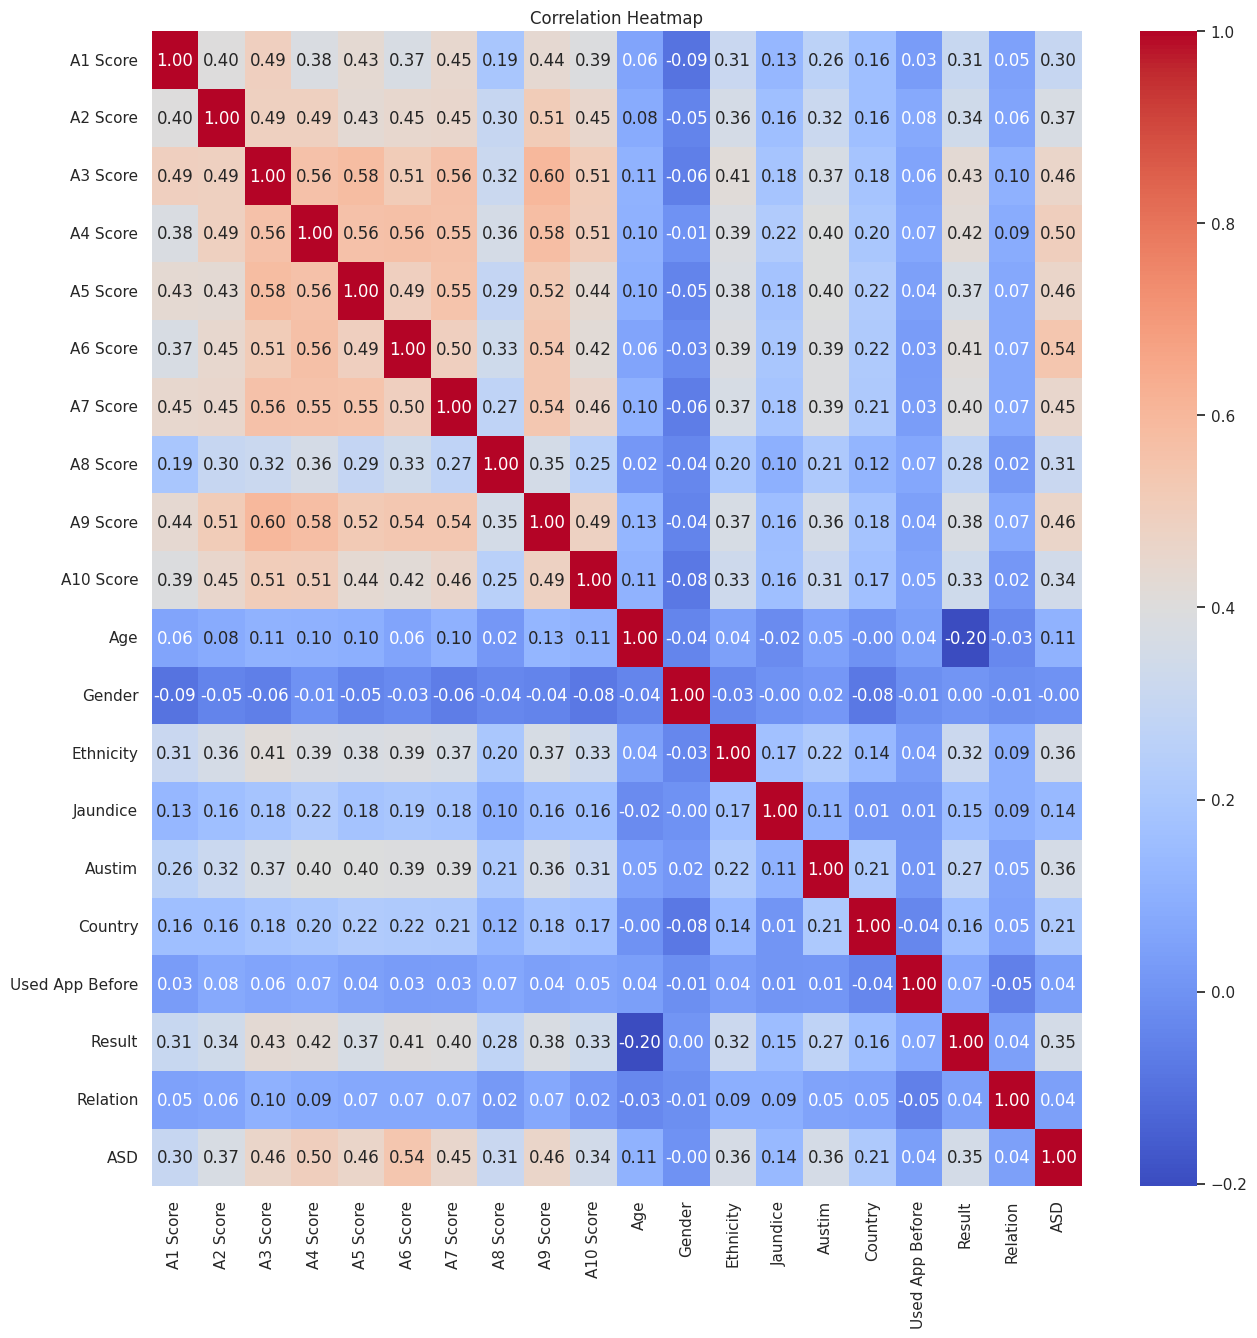

In [132]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Data Preprocessing**

**Handle Outliers**

In [133]:
def replace_outliers_with_median(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  median=df[column].median()
  df[column]=df[column].apply(lambda x: median if x<lower_bound or x>upper_bound else x)
  return df

In [134]:
df=replace_outliers_with_median(df,"Age")
df=replace_outliers_with_median(df,"Result")

In [135]:
df.head()

,A1 Score,A2 Score,A3 Score,A4 Score,A5 Score,A6 Score,A7 Score,A8 Score,A9 Score,A10 Score,Age,Gender,Ethnicity,Jaundice,Austim,Country,Used App Before,Result,Relation,ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [136]:
df.shape

(800, 20)

**Train Test Split**

In [137]:
df.columns

Index(['A1 Score', 'A2 Score', 'A3 Score', 'A4 Score', 'A5 Score', 'A6 Score',
       'A7 Score', 'A8 Score', 'A9 Score', 'A10 Score', 'Age', 'Gender',
       'Ethnicity', 'Jaundice', 'Austim', 'Country', 'Used App Before',
       'Result', 'Relation', 'ASD'],
      dtype='object')

In [138]:
X=df.drop(columns=["ASD"])
Y=df["ASD"]

In [139]:
print(X)

     A1 Score  A2 Score  A3 Score  A4 Score  A5 Score  A6 Score  A7 Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8 Score  A9 Score  A10 Score   Age  Gender  Ethnicity  Jaundice  Aust

In [140]:
print(Y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: ASD, Length: 800, dtype: int64


In [141]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [142]:
print(Y_train.shape)
print(Y_test.shape)

(640,)
(160,)


In [143]:
Y_train.value_counts()

,count
ASD,
0,515
1,125


In [144]:
Y_test.value_counts()

,count
ASD,
0,124
1,36


**SMOTE (Synthetic Minority Oversampling Technique)**

In [145]:
smote=SMOTE(random_state=42)

In [146]:
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)

In [147]:
print(Y_train_smote.shape)

(1030,)


In [148]:
print(Y_train_smote.value_counts())

ASD
1    515
0    515
Name: count, dtype: int64


**Model Training**

In [149]:
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
}

In [150]:
cv_scores={}
for model_name,model in models.items():
  print(f"Training {model_name} with Default Parameters")
  scores=cross_val_score(model,X_train_smote,Y_train_smote,cv=5,scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)

Training Decision Tree with Default Parameters
Decision Tree Cross-Validation Accuracy: 0.86
--------------------------------------------------
Training Random Forest with Default Parameters
Random Forest Cross-Validation Accuracy: 0.92
--------------------------------------------------


In [78]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ])}

**Model Selection and Hyperparameter Tuning**

In [151]:
decision_tree=DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)

In [152]:
#Hyperparameter grids for RandomizedSearchCV
param_grid_dt={
    "criterion":["gini","entropy"],
    "max_depth":[None,10,20,30,50,70],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}
param_grid_rf={
    "n_estimators":[50,100,200,500],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True,False]
}

In [153]:
#Perform RandomizedSearchCV for each model
random_search_dt=RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid_dt,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_search_rf=RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid_rf,n_iter=20,cv=5,scoring="accuracy",random_state=42)

In [154]:
#Fit the models
random_search_dt.fit(X_train_smote,Y_train_smote)
random_search_rf.fit(X_train_smote,Y_train_smote)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [155]:
best_model=None
best_score=0
if random_search_dt.best_score_>best_score:
  best_model=random_search_dt.best_estimator_
  best_score=random_search_dt.best_score_
if random_search_rf.best_score_>best_score:
  best_model=random_search_rf.best_estimator_
  best_score=random_search_rf.best_score_

In [156]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
Best Cross-Validation Accuracy: 0.93


In [157]:
#Save the model
with open("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

**Evaluation**

In [160]:
Y_test_pred=best_model.predict(X_test)
print("Accuracy Ccore:\n",accuracy_score(Y_test,Y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_test_pred))
print("Classification Report:\n",classification_report(Y_test,Y_test_pred))

Accuracy Ccore:
 0.81875
Confusion Matrix:
 [[108  16]
 [ 13  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       124
           1       0.59      0.64      0.61        36

    accuracy                           0.82       160
   macro avg       0.74      0.75      0.75       160
weighted avg       0.82      0.82      0.82       160

